In [1]:
import generator_object, write_run_plot, serial_sim_tools
import numpy as np

from importlib import reload
for obj in [generator_object, write_run_plot, serial_sim_tools]:
    reload(obj)

In [2]:
def remove(name):
    import os, shutil
    path_rem = f'/home/brewster/Desktop/cretin_package-master/Personal_experiments/{name}/images'

    if os.path.isdir(path_rem):
        print(f'\nremoving {path_rem}')
        shutil.rmtree(path_rem)

In [4]:
import generator_object, write_run_plot, serial_sim_tools, animate, plt_file, to_generator_string


from importlib import reload
for obj in [generator_object, to_generator_string, write_run_plot, serial_sim_tools, animate, plt_file]:
    reload(obj)

def lasfoam_tin(n, l):

    gen = generator_object.User_input()
    
    rho, T_ev = 1, 0.5
    z = 12. #
    N0, N1 = 1, 500  # We are operating in 1d wih 500 nodes
    Rmin, Rmax = 0, 30.e-4 #node min max max = 10^-6m = 30 micron 
    ILASER, TLASER = 1e18, 1.e-9 #corresponds to 10^11 W/cm^2
    wavelength_laser = 1 # corresponds to 1*1.06 micrometer

    gen.materials_atom(index = 1, element = "sn")
    gen.materials_atom_isorange('all', n_max = n, lmax = l)
    gen.materials_atom_modeltype(['dca'])
    gen.materials_region([N0,N1], elec_temp = T_ev)
    gen.materials_region_rho(rho)
    gen.materials_region_element(initial_ion_population = 1.0, index = 1)

    gen.geometry(type='slab')
    gen.geometry_nodes(coordinate = "r", scaling_type = "lin", nodes = [N0, N1], nodes_range = [Rmin, Rmax])

    gen.radiation_ebins(n_boundaries = 61, start = 0.1, end = 10**(5))
    gen.radiation_angles(n_rays = 3)

    gen.controls(t_start = 0., t_end = 3e-9, restart = True)

    gen.controls_history(id = 1, value_mutiplier = ILASER, time_multiplier = TLASER)
    gen.controls_history_tv(time = 0., value = 1)
    gen.controls_history_tv(time = 1.0, value = 1.)
    gen.controls_history_tv(time = 1.0, value = 0.)

    gen.sources_source_laser(laser_wavelength = wavelength_laser, option_1 = 'rate', option_2 = 'history', values = [1,1.], nodes = [N0, round(N1/10)])
    gen.parameters(scattering_multiplier = 0,initial_timestep = 10**-13, minimum_timestep = 10**-16, maximum_timestep = 10**-10, time_between_snapshots = 10**(-9))

    gen.popular_switches(continuum_transfer_evolves_temp = True,
                         mesh_treatment = 'staggered centering (node + zones)')
    gen.other_switches(control_calc_thermal_conduct = 'include thermal conduction', 
                       population_calculation = "time dependent diffusion", 
                       temperature_calculation = 'use electronic heating rates for time-dependent')
    
    gen.sources_rswitch(radiation_transfer_algorithm1d= 'do transport using integral formalism', assume_NLTE= True)

    gen.add_plot(title='electron number density', xvars={'time':[],'ir':[0,0]}, yvars={'ne':[0,0]})
    gen.add_plot(title='mass density', xvars={'time':[],'ir':[0,0]}, yvars={'zrho':[0,0]})  
    gen.add_plot(title='charge state', xvars={'time':[],'ir':[0,0]}, yvars={'zbar':[0,0]}) 

    gen.add_plot(title='electron temperature', xvars={'time':[],'ir':[0,0]}, yvars={'tev':[0,0]})
    gen.add_plot(title='radiation remperature', xvars={'time':[],'ir':[0,0]}, yvars={'trv':[0,0]}) 

    gen.add_plot(title='net energy gain due to laser absorption', xvars={'time':[],'ir':[0,0]}, yvars={'heatl':[0,0]})  
    gen.add_plot(title='net energy gain due to radiation absorption', xvars={'time':[],'ir':[0,0]}, yvars={'heatj':[0,0]}) 
    gen.add_plot(title='Net free electron heating rate due to all processes', xvars={'time':[],'ir':[0,0]}, yvars={'heatt':[0,0]}) 

    return gen

import time
times = []
for n in range(5):
    for l in range(n):
        if not (n == 1 and l == 0):

            sim4 = lasfoam_tin(n, l)
            name = f'Howard_scott36_extra_plots/Howard_scott36_{n}_{l}'
            #write_run_plot.write(name = name, object = sim4, longprint=False, plot_duplicates=False)
            #write_run_plot.all(name = name, object = sim4, longprint=False, plot_duplicates=False)
            before  = time.time()
            #write_run_plot.run(name = name, object = sim4, longprint=False)
            #write_run_plot.extra_plot(name = name, make_animation=True)
            #write_run_plot.plot(name = name, object = sim4, longprint=False)
            after = time.time()
            t_minutes = round((after - before)/60, 2)
            print(f'{n} {l} {t_minutes} minutes')
            times.append([n, l , after-before])
        


2 0 0.0 minutes
2 1 0.0 minutes
3 0 0.0 minutes
3 1 0.0 minutes
3 2 0.0 minutes
4 0 0.0 minutes
4 1 0.0 minutes
4 2 0.0 minutes
4 3 0.0 minutes


In [95]:
import generator_object, write_run_plot, serial_sim_tools, animate, plt_file, to_generator_string


from importlib import reload
for obj in [generator_object, to_generator_string, write_run_plot, serial_sim_tools, animate, plt_file]:
    reload(obj)

def spectrum_tin(t):

    gen = generator_object.User_input()
    
    rho, T_ev = 1, t
    z = 12. #
    N0, N1 = 1, 1  # We are operating in 1d wih 500 nodes
    Rmin, Rmax = 0, 30.e-4 #node min max max = 10^-6m = 30 micron 


    gen.materials_atom(index = 1, element = "sn")
    gen.materials_atom_isorange('all', n_max = 4, lmax = 2)
    gen.materials_atom_modeltype(['dca'])
    gen.materials_region([N0,N1], elec_temp = T_ev)
    gen.materials_region_rho(rho)
    gen.materials_region_element(initial_ion_population = 1.0, index = 1)

    gen.geometry(type='slab')
    gen.geometry_nodes(coordinate = "r", scaling_type = "lin", nodes = [1, 1], nodes_range = [Rmin, Rmax])

    gen.radiation_ebins(n_boundaries = 201, start = 0.01, end = 2*10**(3))
    gen.radiation_angles(n_rays = 3)

    gen.controls(t_start = 0., t_end = 0., restart = True)

    gen.popular_switches(continuum_transfer_evolves_temp = True,
                         mesh_treatment = 'staggered centering (node + zones)')
    gen.other_switches(control_calc_thermal_conduct = 'include thermal conduction', 
                       population_calculation = "time dependent diffusion", 
                       temperature_calculation = 'use electronic heating rates for time-dependent')
    
    gen.sources_rswitch(radiation_transfer_algorithm1d= 'do transport using integral formalism', assume_NLTE= True)
    gen.datadump(dump_spectral=True)

    #gen.add_plot(title='net energy gain due to laser absorption', xvars={'iso':[1]}, yvars={'yisofrac':[1,1]})  
    #gen.add_plot(title='EMISSIONABSORPTION',xvars={'energy': []},  # No specific values given, so leaving it empty
    #    yvars={'cemis': [0, 1],'ckappa': [0, 1]})
    #gen.add_plot(title='EMISSIONABSORPTION1',xvars={'ebins': []},  # No specific values given, so leaving it empty
    #    yvars={'cemis': [0, 1],'ckappa': [0, 1] })

    return gen


i0 = 0
trials = []
name = 'spectral_tin'
N, M = 6, 4 # this is the multiplot group size and number of groups
iend = 1

for i in range(i0,N*M):
    name_i = name+str(i)
    trials.append(name_i)
    tev = 0.01*1.2**i
    gen2 = spectrum_tin(tev)

    write_run_plot.write(name = name_i, object = gen2, longprint=False, plot_duplicates=False)
    write_run_plot.run(name = name_i, object = gen2, longprint=False, plot_duplicates=False)

    if (i>0 and i%N == 0):
        serial_sim_tools.plot_all(f'trials_mutiplot{int(i/N)}', trials)
        trials = []

    elif i == iend -1:
        serial_sim_tools.plot_all(f'trials_mutiplot{int(i/N)+1}', trials)
        



writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/spectral_tin0/spectral_tin0.gen
running cretin with spectral_tin0
multiplot to /home/brewster/Desktop/cretin_package-master/Personal_experiments/trials_mutiplot1

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/spectral_tin1/spectral_tin1.gen
running cretin with spectral_tin1

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/spectral_tin2/spectral_tin2.gen
running cretin with spectral_tin2

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/spectral_tin3/spectral_tin3.gen
running cretin with spectral_tin3

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/spectral_tin4/spectral_tin4.gen
running cretin with spectral_tin4

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/spectral_tin5/spectral_tin5.gen
running cretin with spectral_tin5

writing to /home/brewster/Desktop/creti

In [79]:
import search
reload(search)

search_for_word = 'yvar jsp'

df = search.Generators().word(input = search_for_word, word_slicing = (0,5), print_path = True)
print(df.to_string())


search_inside_chapter = 'Switches and Parameters'
#print(search.Generators().chapter(input = search_inside_chapter))

/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//thd/thd.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//thd/thd.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spec1d.gen
/home/brewster/Desktop/cretin_package-master/Premade_cretin_tests//spec1d/spe

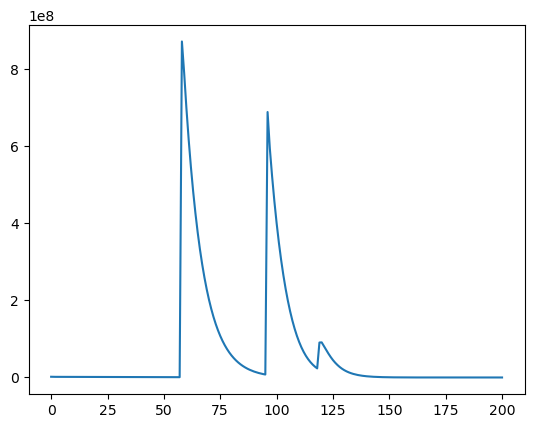

In [86]:
import matplotlib.pyplot as plt



s1 ="""1.86644996e+06 1.64295316e+06 1.62395286e+06 1.60551341e+06
  1.58881527e+06 1.57208361e+06 1.55531692e+06 1.53851362e+06
  1.52167209e+06 1.50479065e+06 1.48786755e+06 1.47090100e+06
  1.45388915e+06 1.43683007e+06 1.41972181e+06 1.40256233e+06
  1.38534956e+06 1.36808137e+06 1.35075557e+06 1.33438891e+06
  1.31973544e+06 1.30500950e+06 1.29020801e+06 1.27532778e+06
  1.26036556e+06 1.24531801e+06 1.23018171e+06 1.21495316e+06
  1.19962881e+06 1.18420503e+06 1.16867814e+06 1.15304442e+06
  1.13730013e+06 1.12144149e+06 1.10546472e+06 1.09078580e+06
  1.07751336e+06 1.06408927e+06 1.05050799e+06 1.03676395e+06
  1.02285161e+06 1.00876539e+06 9.94499796e+05 9.80049407e+05
  9.65408911e+05 9.50573156e+05 9.35537190e+05 9.20296315e+05
  9.04846134e+05 8.89182618e+05 8.73302164e+05 8.58774016e+05
  8.45064552e+05 8.31079515e+05 8.16814002e+05 8.02263774e+05
  7.87425357e+05 7.72296145e+05 8.71125089e+08 7.89637305e+08
  6.97975710e+08 6.16896589e+08 5.45180921e+08 4.81749940e+08
  4.25649013e+08 3.76033365e+08 3.32155447e+08 2.93355040e+08
  2.59045970e+08 2.28709731e+08 2.01888006e+08 1.78175258e+08
  1.57212663e+08 1.38682736e+08 1.22304577e+08 1.07829661e+08
  9.50381121e+07 8.37354095e+07 7.37494682e+07 6.49280576e+07
  5.71365156e+07 5.02557265e+07 4.41803303e+07 3.88177903e+07
  3.40851041e+07 2.99092315e+07 2.62257101e+07 2.29775337e+07
  2.01142912e+07 1.75914043e+07 1.53694525e+07 1.34135750e+07
  1.16929420e+07 1.01802856e+07 8.85148526e+06 7.68520010e+06
  6.88218048e+08 5.93883737e+08 5.21850654e+08 4.57753489e+08
  4.00752333e+08 3.50104743e+08 3.05153459e+08 2.65315421e+08
  2.30071844e+08 1.98959315e+08 1.71561893e+08 1.47504212e+08
  1.26445610e+08 1.08075275e+08 9.21083746e+07 7.82831105e+07
  6.63585775e+07 5.61132795e+07 4.73441347e+07 3.98657979e+07
  3.35100949e+07 2.81255360e+07 2.35767039e+07 9.06434553e+07
  9.09999164e+07 8.11629614e+07 7.13089610e+07 6.18216161e+07
  5.30115144e+07 4.50741427e+07 3.82359561e+07 3.23209959e+07
  2.71377893e+07 2.27408764e+07 1.90337474e+07 1.59208886e+07
  1.33136154e+07 1.11142069e+07 9.26041956e+06 7.71559001e+06
  6.42849867e+06 5.35601303e+06 4.46250993e+06 3.71818999e+06
  3.09813459e+06 2.58158679e+06 2.15126256e+06 1.79274500e+06
  1.49404792e+06 1.24518210e+06 1.03782694e+06 8.65051898e+05
  7.21084435e+05 6.01116216e+05 5.01142056e+05 4.17825709e+05
  3.48388083e+05 2.90514144e+05 2.42275376e+05 2.02065211e+05
  1.68545241e+05 1.40600429e+05 1.17301800e+05 9.78753666e+04
  8.16762511e+04 6.81671269e+04 5.69002593e+04 4.75025217e+04
  3.96550052e+04 3.30784002e+04 2.75608127e+04 2.29640648e+04
  1.91347396e+04 1.59449398e+04 1.32950895e+04 1.11769913e+04
  9.76798556e+03 1.18639712e+04 5.31143238e+04 6.82037528e+04
  5.72658261e+04 4.81394049e+04 4.04705277e+04 3.38441745e+04
  2.82907585e+04 2.36547759e+04 1.98038256e+04 1.85511333e+04
  2.33820139e+04 1.96857711e+04 1.65765252e+04 1.53925028e+04
  1.37019774e+04 1.14787463e+04 9.60174990e+03 8.03376727e+03
  6.71923229e+03 5.61181849e+03 4.68686725e+03 3.91106883e+03
  3.26409822e+03 2.72452262e+03 2.27447148e+03 1.89905293e+03
  1.58585670e+03
  """

def pltplot(s):
    dat = []
    for entry in s.split():
        dat.append(float(entry))
    dat = np.array(dat)
    plt.plot(dat)

#pltplot(s)
pltplot(s1)
plt.show()